## Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Train
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Codification  
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_excel('gameInfosTreated.xlsx')

df

,title,release,plataform,metascore,critic_reviews,user_score,ratings_numbers,developer,players_number,genre_split
0,THE LEGEND OF ZELDA: OCARINA OF TIME,11/23/1998,Nintendo 64,99,22,9.1,7511,Nintendo,1 Player,Action Adventure
1,THE LEGEND OF ZELDA: OCARINA OF TIME,11/23/1998,Nintendo 64,99,22,9.1,7511,Nintendo,1 Player,Fantasy
2,TONY HAWK'S PRO SKATER 2,09/20/2000,PlayStation,98,19,7.4,869,Neversoft Entertainment,1-2,Sports
3,TONY HAWK'S PRO SKATER 2,09/20/2000,PlayStation,98,19,7.4,869,Neversoft Entertainment,1-2,Alternative
4,TONY HAWK'S PRO SKATER 2,09/20/2000,PlayStation,98,19,7.4,869,Neversoft Entertainment,1-2,Skateboarding
...,...,...,...,...,...,...,...,...,...,...
64558,RIDE TO HELL: RETRIBUTION,06/24/2013,PC,16,9,1.4,609,Eutechnyx,1-2 Player(s),Action Adventure
64559,RIDE TO HELL: RETRIBUTION,06/24/2013,PC,16,9,1.4,609,Eutechnyx,1-2 Player(s),General
64560,FAMILY PARTY: 30 GREAT GAMES OBSTACLE ARCADE,12/04/2012,Wii U,11,8,2.7,195,"Art Co., Ltd.",No Online Multiplayer,Miscellaneous
64561,FAMILY PARTY: 30 GREAT GAMES OBSTACLE ARCADE,12/04/2012,Wii U,11,8,2.7,195,"Art Co., Ltd.",No Online Multiplayer,Party


### Tests

In [4]:
#df = df[(df['metascore'] < 95) & (df['metascore'] > 70)]

In [5]:
#df = df.drop_duplicates(subset='title', keep='first')

In [6]:
df.sort_values(by='title')

,title,release,plataform,metascore,critic_reviews,user_score,ratings_numbers,developer,players_number,genre_split
41890,#DRIVE,02/16/2021,Switch,69,7,7.0,5,Dariusz Pietrala,No Online Multiplayer,Racing
41891,#DRIVE,02/16/2021,Switch,69,7,7.0,5,Dariusz Pietrala,No Online Multiplayer,Arcade
41892,#DRIVE,02/16/2021,Switch,69,7,7.0,5,Dariusz Pietrala,No Online Multiplayer,Automobile
23045,#IDARB,01/30/2015,Xbox One,77,31,6.9,90,Other Ocean Interactive,1-2 Player(s),Action
23046,#IDARB,01/30/2015,Xbox One,77,31,6.9,90,Other Ocean Interactive,1-2 Player(s),Miscellaneous
...,...,...,...,...,...,...,...,...,...,...
43687,ZWEI: THE ARGES ADVENTURE,01/24/2018,PC,68,13,8.0,7,Falcom,No Online Multiplayer,Role-Playing
43689,ZWEI: THE ARGES ADVENTURE,01/24/2018,PC,68,13,8.0,7,Falcom,No Online Multiplayer,Action RPG
43688,ZWEI: THE ARGES ADVENTURE,01/24/2018,PC,68,13,8.0,7,Falcom,No Online Multiplayer,General
19168,ZWEI: THE ILVARD INSURRECTION,10/31/2017,PC,79,8,8.2,12,Falcom,No Online Multiplayer,Action RPG


In [7]:
display(df)

,title,release,plataform,metascore,critic_reviews,user_score,ratings_numbers,developer,players_number,genre_split
0,THE LEGEND OF ZELDA: OCARINA OF TIME,11/23/1998,Nintendo 64,99,22,9.1,7511,Nintendo,1 Player,Action Adventure
1,THE LEGEND OF ZELDA: OCARINA OF TIME,11/23/1998,Nintendo 64,99,22,9.1,7511,Nintendo,1 Player,Fantasy
2,TONY HAWK'S PRO SKATER 2,09/20/2000,PlayStation,98,19,7.4,869,Neversoft Entertainment,1-2,Sports
3,TONY HAWK'S PRO SKATER 2,09/20/2000,PlayStation,98,19,7.4,869,Neversoft Entertainment,1-2,Alternative
4,TONY HAWK'S PRO SKATER 2,09/20/2000,PlayStation,98,19,7.4,869,Neversoft Entertainment,1-2,Skateboarding
...,...,...,...,...,...,...,...,...,...,...
64558,RIDE TO HELL: RETRIBUTION,06/24/2013,PC,16,9,1.4,609,Eutechnyx,1-2 Player(s),Action Adventure
64559,RIDE TO HELL: RETRIBUTION,06/24/2013,PC,16,9,1.4,609,Eutechnyx,1-2 Player(s),General
64560,FAMILY PARTY: 30 GREAT GAMES OBSTACLE ARCADE,12/04/2012,Wii U,11,8,2.7,195,"Art Co., Ltd.",No Online Multiplayer,Miscellaneous
64561,FAMILY PARTY: 30 GREAT GAMES OBSTACLE ARCADE,12/04/2012,Wii U,11,8,2.7,195,"Art Co., Ltd.",No Online Multiplayer,Party


### Drop columns

In [8]:
df = df.drop(['release', 'players_number'], axis=1)

display(df)
print(df.shape)

,title,plataform,metascore,critic_reviews,user_score,ratings_numbers,developer,genre_split
0,THE LEGEND OF ZELDA: OCARINA OF TIME,Nintendo 64,99,22,9.1,7511,Nintendo,Action Adventure
1,THE LEGEND OF ZELDA: OCARINA OF TIME,Nintendo 64,99,22,9.1,7511,Nintendo,Fantasy
2,TONY HAWK'S PRO SKATER 2,PlayStation,98,19,7.4,869,Neversoft Entertainment,Sports
3,TONY HAWK'S PRO SKATER 2,PlayStation,98,19,7.4,869,Neversoft Entertainment,Alternative
4,TONY HAWK'S PRO SKATER 2,PlayStation,98,19,7.4,869,Neversoft Entertainment,Skateboarding
...,...,...,...,...,...,...,...,...
64558,RIDE TO HELL: RETRIBUTION,PC,16,9,1.4,609,Eutechnyx,Action Adventure
64559,RIDE TO HELL: RETRIBUTION,PC,16,9,1.4,609,Eutechnyx,General
64560,FAMILY PARTY: 30 GREAT GAMES OBSTACLE ARCADE,Wii U,11,8,2.7,195,"Art Co., Ltd.",Miscellaneous
64561,FAMILY PARTY: 30 GREAT GAMES OBSTACLE ARCADE,Wii U,11,8,2.7,195,"Art Co., Ltd.",Party


(64563, 8)


## Codification

In [9]:
le_title = LabelEncoder()

# Aplicating the LabelEncoding in column "genre_split"
df['title'] = le_title.fit_transform(df['title'])

In [10]:
le_genre = LabelEncoder()

# Aplicating the LabelEncoding in column "genre_split"
df['genre_split'] = le_genre.fit_transform(df['genre_split'])

In [11]:
'''le_release = LabelEncoder()

# Aplicating the LabelEncoding in column "release"
df['release'] = le_release.fit_transform(df['release'])'''

'le_release = LabelEncoder()\n\n# Aplicating the LabelEncoding in column "release"\ndf[\'release\'] = le_release.fit_transform(df[\'release\'])'

In [12]:
le_plat = LabelEncoder()

# Aplicating the LabelEncoding in column "plataform"
df['plataform'] = le_plat.fit_transform(df['plataform'])

In [13]:
le_developer = LabelEncoder()

# Aplicating the LabelEncoding in column "developer"
df['developer'] = le_developer.fit_transform(df['developer'])

In [14]:
df

,title,plataform,metascore,critic_reviews,user_score,ratings_numbers,developer,genre_split
0,10252,5,99,22,9.1,7511,2165,174
1,10252,5,99,22,9.1,7511,2165,44
2,10808,8,98,19,7.4,869,2132,224
3,10808,8,98,19,7.4,869,2132,8
4,10808,8,98,19,7.4,869,2132,124
...,...,...,...,...,...,...,...,...
64558,8068,6,16,9,1.4,609,1035,5
64559,8068,6,16,9,1.4,609,1035,56
64560,3370,17,11,8,2.7,195,211,204
64561,3370,17,11,8,2.7,195,211,100


## Convert to original format

In [15]:
#df['plataform'] = le_plat.inverse_transform(df['plataform'])
#df['developer'] = le_developer.inverse_transform(df['developer'])

In [16]:
df

,title,plataform,metascore,critic_reviews,user_score,ratings_numbers,developer,genre_split
0,10252,5,99,22,9.1,7511,2165,174
1,10252,5,99,22,9.1,7511,2165,44
2,10808,8,98,19,7.4,869,2132,224
3,10808,8,98,19,7.4,869,2132,8
4,10808,8,98,19,7.4,869,2132,124
...,...,...,...,...,...,...,...,...
64558,8068,6,16,9,1.4,609,1035,5
64559,8068,6,16,9,1.4,609,1035,56
64560,3370,17,11,8,2.7,195,211,204
64561,3370,17,11,8,2.7,195,211,100


# Train

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('metascore', axis=1), df['metascore'], test_size=0.30)

## KNN model

In [18]:
'''knn = KNeighborsClassifier(n_neighbors=3)

# Treinando o modelo
knn.fit(X_train, y_train)

# Realizando as previsões com os dados de teste
y_pred = knn.predict(X_test)

# Avaliando a acurácia do modelo
accuracy = knn.score(X_test, y_pred)
print("Accuracy:", accuracy)'''

'knn = KNeighborsClassifier(n_neighbors=3)\n\n# Treinando o modelo\nknn.fit(X_train, y_train)\n\n# Realizando as previsões com os dados de teste\ny_pred = knn.predict(X_test)\n\n# Avaliando a acurácia do modelo\naccuracy = knn.score(X_test, y_pred)\nprint("Accuracy:", accuracy)'

## Linear Regression

In [19]:
# instanciar o modelo de Regressão Linear
regressor = LinearRegression()

# treinar o modelo com os dados de treinamento
regressor.fit(X_train, y_train)

# fazer previsões com os dados de teste
y_pred_lr = regressor.predict(X_test)

In [20]:
mae = mean_absolute_error(y_test, y_pred_lr)

print("MAE: ", mae)

MAE:  7.799388963795596


## Random Forest

In [21]:
# Create a model
clf = RandomForestClassifier(n_estimators=20)

# Train the model with training data
clf.fit(X_train, y_train)

# Make predictions using test data
y_pred_rf = clf.predict(X_test)

In [22]:
# Accuracy

accuracy = accuracy_score(y_test, y_pred_rf)

print("Acurácia:", round(accuracy,4))

Acurácia: 0.9206


In [23]:
# Precion

precision = precision_score(y_test, y_pred_rf, pos_label='positive', average='micro')

print('Precision: %.4f' % precision)

Precision: 0.9206


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [24]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

          16       1.00      1.00      1.00         5
          17       1.00      1.00      1.00         4
          18       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         1
          20       1.00      1.00      1.00         3
          21       1.00      1.00      1.00         2
          23       1.00      1.00      1.00         6
          24       1.00      1.00      1.00         5
          25       1.00      1.00      1.00        12
          26       1.00      1.00      1.00        14
          27       1.00      1.00      1.00        10
          28       1.00      1.00      1.00         5
          29       1.00      1.00      1.00        11
          30       0.75      1.00      0.86        12
          31       1.00      1.00      1.00         5
          32       0.89      1.00      0.94        34
          33       0.75      1.00      0.86        21
          34       1.00    

## Decision Tree Classifier

In [25]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [26]:
# Accuracy 

acc_dtc = accuracy_score(y_test, y_pred)

print('Accuracy:', round(acc_dtc,4))

Accuracy: 0.8798


In [27]:
# Confussion matrix 

### Graphs

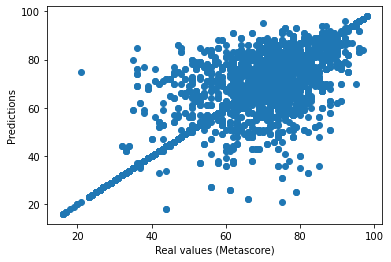

In [28]:
# Suponha que você tenha as seguintes variáveis:
# real_values: as respostas reais (notas do Metascore)
# predictions: as previsões feitas pelo modelo

plt.scatter(y_test, y_pred)
plt.xlabel("Real values (Metascore)")
plt.ylabel("Predictions")
plt.show()

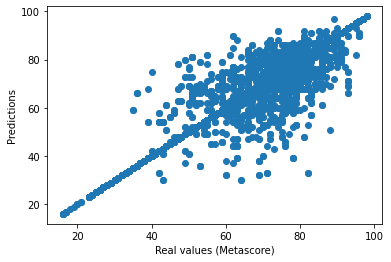

In [29]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Real values (Metascore)")
plt.ylabel("Predictions")
plt.show()